# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah **Heart Failure Prediction** yang diambil dari **Kaggle**, dapat diakses melalui tautan berikut: [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction]. Dataset ini kemudian diunduh dan diakses secara lokal dengan nama file `heart.csv`.

2. **Deskripsi Dataset**:  
   Dataset ini berisi **918 baris dan 12 kolom fitur**, yang berkaitan dengan karakteristik pasien dan riwayat medis terkait penyakit jantung. Dataset ini tidak memiliki nilai *missing value*. Selanjutnya, dataset akan melalui tahapan preprocessing untuk mempersiapkannya digunakan dalam pembuatan sistem prediksi kemungkinan terjadinya penyakit jantung.


# **2. Import Library**

Pada tahap ini, saya perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Library-library ini digunakan untuk berbagai keperluan seperti:
- manipulasi data (pandas, numpy),
- visualisasi data (matplotlib, seaborn),
- preprocessing manual dan otomatis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler

# **3. Memuat Dataset**

Pada tahap ini, dataset akan dimuat ke dalam notebook menggunakan pustaka pandas. Dataset yang digunakan berformat .csv dan telah disimpan secara lokal dengan nama heart.csv. Untuk memastikan bahwa data berhasil dimuat dan memiliki struktur yang sesuai, akan ditampilkan beberapa baris awal dataset.

In [2]:
df = pd.read_csv("../heart.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan. 

### **1. Pengecekan Tipe Data**
- Kode ini digunakan untuk mengecek atau memeriksa tipe data dari setiap kolom yang ada di variabel df, dan terdapat 2 tipe data yaitu int, float, dan object.
- untuk int masuk ke numerik antara lain : Age, RestingBP, Cholesterol, FastingBS, MaxHR, HeartDisease.
- untuk float masuk ke numerik antara lain : Oldpeak. 
- sedangkan untuk objek masuk ke kategorikal antara lain : Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

In [3]:
data_types = df.dtypes
print(data_types)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### **2. Penjelasan setiap Fitur**

Descriptive merupakan fungsi yang digunakan untuk menghasilkan statistik deskriptif dari kolom-kolom numerik di dalam dataframe df.
Statistik yang ditampilkan mencakup:
- count: jumlah nilai yang tidak kosong (non-NaN),
- mean: nilai rata-rata,
- std: standar deviasi (penyebaran data),
- min: nilai minimum,
- 25%, 50%, 75%: kuartil 1, median, dan kuartil 3,
- max: nilai maksimum.

Pada data ini, terdapat 8.807 baris data, kemudian untuk penjelasannya antara lain : 
1.	Age
    - Rata-rata: 53.51
    - Minimum: 28
    - Maksimum: 77
    - Rentang usia pasien berkisar dari 28 hingga 77 tahun, yang merupakan rentang usia dewasa hingga lanjut usia. Tidak terlihat adanya outlier mencolok dalam kolom ini.
2.	RestingBP (Tekanan darah saat istirahat)
    - Rata-rata: 132.40
    - Minimum: 0
    - Maksimum: 200
    - Nilai minimum 0 menunjukkan adanya kemungkinan data error atau missing value yang tidak ditangani dengan baik, karena tekanan darah tidak mungkin 0 dalam kondisi hidup.
3.	Cholesterol
    - Rata-rata: 198.80
    - Minimum: 0
    - Maksimum: 603
    - Sama seperti RestingBP, nilai minimum 0 menunjukkan kemungkinan data tidak valid atau belum diukur. Nilai maksimum 603 termasuk tinggi, tetapi masih mungkin terjadi pada kasus kolesterol ekstrem.
4.	FastingBS (Gula darah puasa > 120 mg/dl: 1 = ya, 0 = tidak)
    - Rata-rata: 0.23
    - Minimum: 0
    - Maksimum: 1
    - Data ini bersifat biner (0 dan 1), dan nilai-nilainya sudah sesuai. Tidak ada outlier.
5.	MaxHR (Denyut jantung maksimum saat latihan)
    - Rata-rata: 136.81
    - Minimum: 60
    - Maksimum: 202
    - Rentang ini normal untuk data medis, meskipun nilai 60 dan 202 termasuk ekstrem. Tapi tetap bisa diterima secara klinis, jadi tidak perlu langsung diasumsikan sebagai outlier.
6.	Oldpeak (Depresi ST yang disebabkan oleh olahraga dibandingkan saat istirahat)
    - Rata-rata: 0.89
    - Minimum: -2.6
    - Maksimum: 6.2
    - Nilai negatif Oldpeak tampak janggal karena secara medis depresi ST biasanya bernilai nol atau positif. Perlu ditelusuri apakah -2.6 adalah error atau hasil dari transformasi/pengukuran khusus.
7.	HeartDisease
    - Rata-rata: 0.55
    - Minimum: 0
    - Maksimum: 1
    - Merupakan data biner: 1 berarti menderita penyakit jantung, 0 berarti tidak. Distribusi seimbang, dan tidak terdapat nilai yang mencurigakan.



In [4]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


### **3. Visualisasi Data**
Mengambil semua nama kolom dari dataframe df lalu menghitung berapa banyak baris dan kolom grid yang dibutuhkan agar semua fitur bisa divisualisasikan dalam 3 subplot. Kemudian membuat figure dan axes menggunakan matplotlib, lalu mengubah susunannya agar mudah diakses satu per satu. Dilakukan iterasi untuk setiap kolom dan dibuatkan histogramnya dengan judul masing-masing setiap diagramnya agar mudah untuk dibaca. 

Berdasarkan visualisasi histogram, terdapat penjelasan seperti berikut : 
1.	Distribusi dari Age
Usia pasien memiliki distribusi mendekati normal, dengan konsentrasi utama di rentang usia 40–70 tahun. Puncak distribusi terjadi di usia sekitar 55 tahun, menandakan mayoritas pasien berada dalam kelompok usia paruh baya hingga lanjut.
2.	Distribusi dari Sex
Dataset didominasi oleh pasien berjenis kelamin laki-laki (M), dengan jumlah yang jauh lebih tinggi dibandingkan perempuan (F). Hal ini bisa menjadi bias yang perlu diperhatikan dalam analisis model.
3.	Distribusi dari ChestPainType
Jenis nyeri dada paling umum adalah 'ASY' dan 'ATA'. Tipe 'NAP' juga cukup sering muncul, sementara 'TA' sangat jarang ditemukan. Distribusi ini menunjukkan variasi dalam gejala yang dilaporkan pasien.
4.	Distribusi dari RestingBP (Resting Blood Pressure)
Sebagian besar tekanan darah istirahat berada pada kisaran 110–140 mmHg. Terdapat outlier pada nilai rendah (<75) dan tinggi (>180), yang bisa menjadi data tidak wajar atau kasus klinis khusus.
5.	Distribusi dari Cholesterol
Nilai kolesterol menunjukkan distribusi skewed to the right (positif). Mayoritas pasien memiliki kadar kolesterol antara 150–300 mg/dL, namun ada beberapa nilai ekstrem di atas 400 hingga 600 mg/dL.
6.	Distribusi dari FastingBS (Fasting Blood Sugar)
Sebagian besar pasien memiliki kadar gula darah puasa normal (0), sementara hanya sebagian kecil yang memiliki nilai 1, yang menunjukkan kadar gula darah di atas ambang batas (>120 mg/dL).
7.	Distribusi dari RestingECG (Electrocardiographic Resting Results)
Hasil EKG saat istirahat paling umum adalah 'Normal', diikuti oleh 'LVH' (Left Ventricular Hypertrophy), dan 'ST'. Distribusi ini menunjukkan sebagian besar pasien memiliki hasil EKG normal.
8.	Distribusi dari MaxHR (Maximum Heart Rate Achieved)
Distribusi detak jantung maksimal mendekati normal, dengan mayoritas pasien memiliki MaxHR antara 120–170 bpm. Ini merupakan fitur penting yang berkaitan dengan kapasitas fisik pasien.
9.	Distribusi dari ExerciseAngina
Sebagian besar pasien tidak mengalami angina saat berolahraga ('N'), namun cukup banyak juga yang mengalami gejala angina ('Y'), yang dapat menjadi indikator penting dalam diagnosis penyakit jantung.
10.	Distribusi dari Oldpeak (ST Depression)
Distribusi sangat skewed ke kanan, dengan mayoritas pasien memiliki nilai Oldpeak rendah (<1). Terdapat sejumlah outlier dengan nilai tinggi (>4), yang bisa mencerminkan risiko jantung yang lebih serius.
11.	Distribusi dari ST_Slope (Slope of the Peak Exercise ST Segment)
Tipe kemiringan ST paling umum adalah 'Flat', diikuti oleh 'Up'. Tipe 'Down' merupakan yang paling jarang, namun bisa menjadi indikator penting untuk kondisi jantung tertentu.
12.	Distribusi dari HeartDisease
Target variabel cukup seimbang antara pasien yang memiliki penyakit jantung (1) dan yang tidak (0). Meski begitu, jumlah pasien dengan penyakit jantung sedikit lebih banyak, memberikan data yang relatif seimbang untuk model klasifikasi.


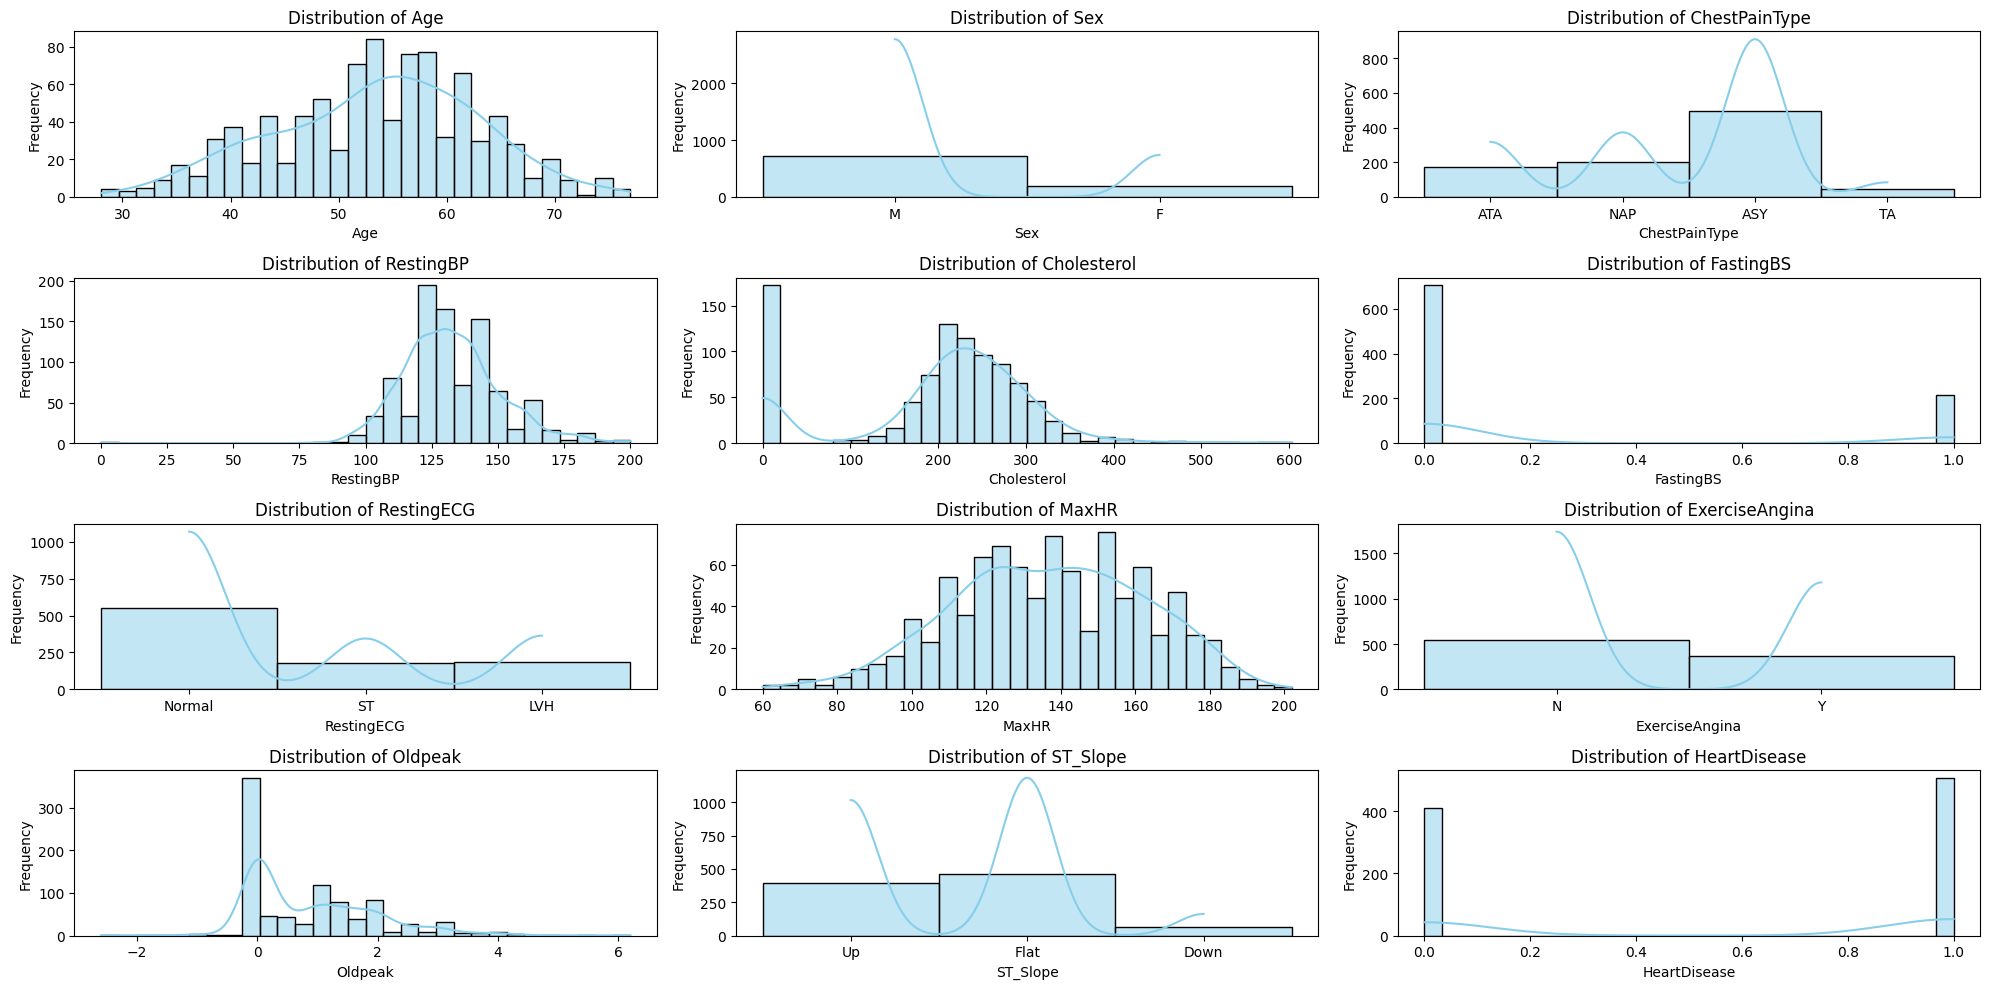

In [5]:
cols = df.columns.to_list()
n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **4. Pengecekan Missing Value**
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat missing value, kemudian di print atau ditampilkan. 
- Hasilnya adalah ada beberapa fitur seperti directior, cast, country, data_added, rating, duration yang memiliki missing value.

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### **5. Pengecekan Duplikat Value**
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat data yang duplikat, kemudian di print atau ditampilkan. 
- Hasilnya adalah tidak ada data yang duplikat disemua kolom

In [7]:
duplicate_rows = df.duplicated()
print(f"\nJumlah baris duplikat: {duplicate_rows.sum()}")


Jumlah baris duplikat: 0


### **6. Pengecekan korelasi antar fitur**
Langkah ini digunakan untuk membuat visualisasi korelasi antara fitur numerik dalam dataset, dalam bentuk heatmap. Dengan adanya langkah ini, dapat mengetahui fitur mana yang saling berkorelasi tinggi atau sangat berhubungan.


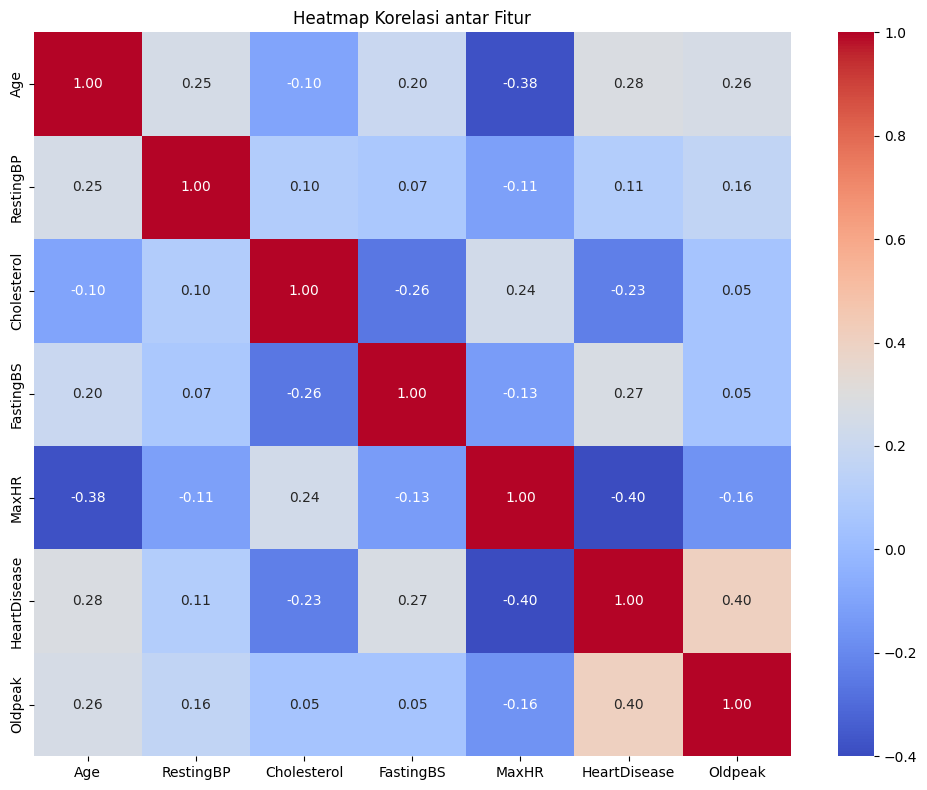

In [8]:
df_selected = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease', 'Oldpeak']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur')
plt.tight_layout()
plt.show()

### **7. Pengecekan Outlier**
Langkah ini digunakan untuk mengecek outlier dari fitur numerik dalam dataset menggunakan boxplot, yaitu jenis grafik statistik yang sangat efektif untuk mendeteksi nilai ekstrem. Outlier penting untuk diidentifikasi karena dapat memengaruhi rata-rata atau model machine learning.

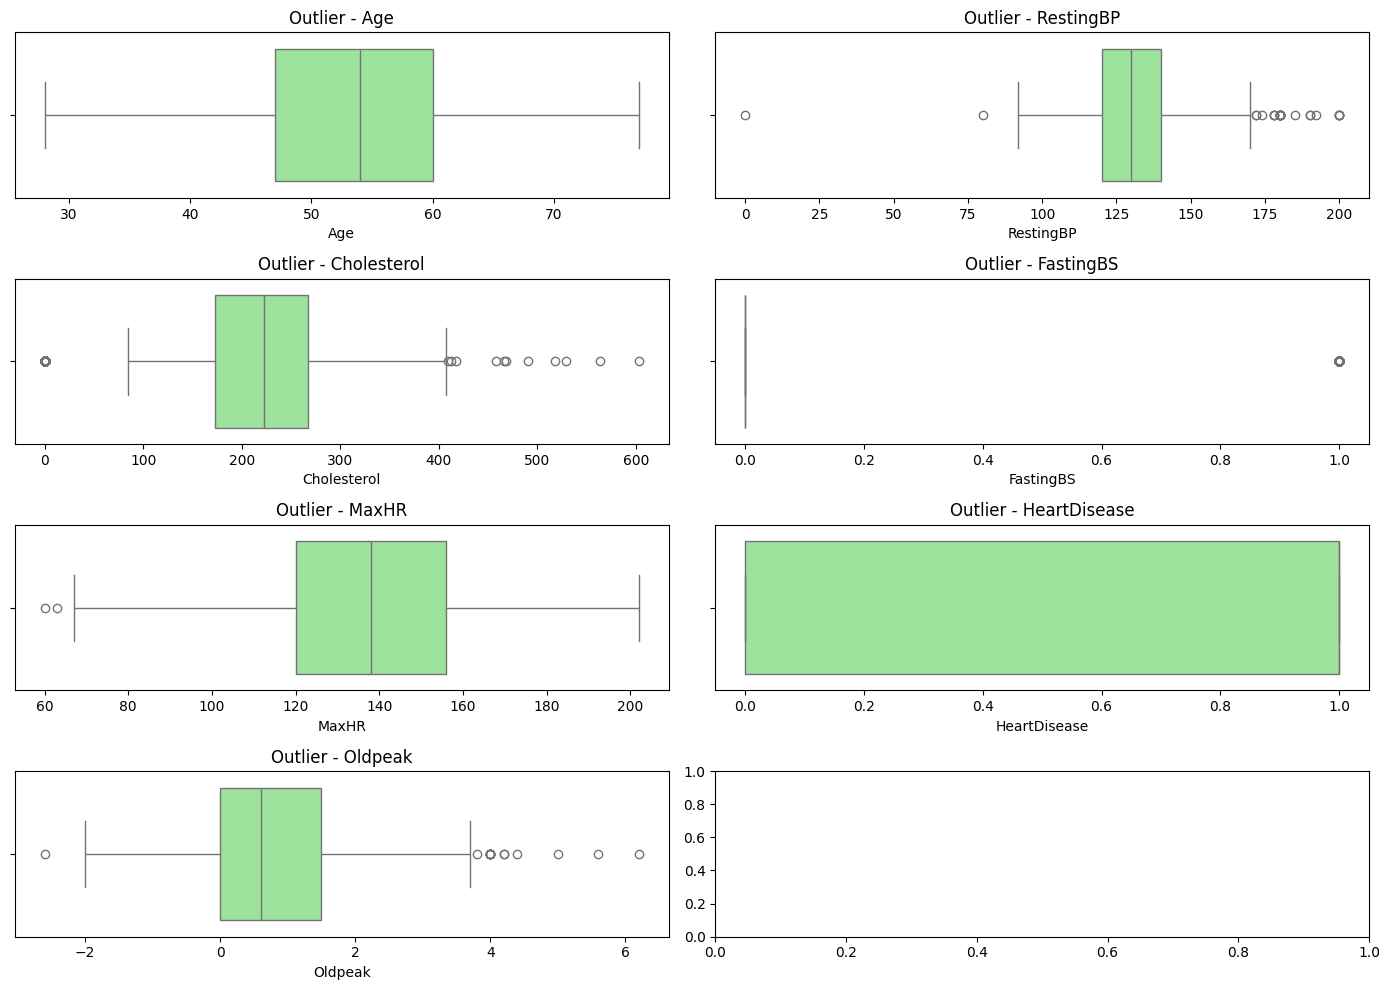

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(df_selected):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Outlier - {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Dataset yang saya miliki, memiliki outlier di beberapa fitur. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang saya lakukan, antara lain:
1. Menghapus Missing Values
2. Menghapus Data Duplikat
3. Menangani nilai 0 pada Resting BP dan Cholesterol
4. Penanganan Outlier
5. Encoding Data Kategorikal
6. Feature Scalling
7. Menyimpan hasil setelah preprocessing

### **1. Menghapus Missing Value**
Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus missing value pada pada semua fitur. 

In [10]:
df_cleaned = df.dropna()
print("Data setelah menghapus Missing Value:", df_cleaned.shape)

Data setelah menghapus Missing Value: (918, 12)


### **2. Menghapus Duplikat Data**
Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus Duplikat Data pada semua fitur. 

In [ ]:
df_cleaned = df_cleaned.drop_duplicates()
print("Data setelah menghapus Dupikat Data:", df_cleaned.shape)

Data setelah menghapus Missing Value: (918, 12)


### **3. Menangani nilai 0 pada Resting BP dan Cholesterol**
kode ini digunakan untuk mengganti nilai 0 pada Resting BP dan Cholesterol dengan NAN kemudian nilai NAN tersebut diisi dengan median.

In [12]:
df_cleaned['RestingBP'].replace(0, pd.NA, inplace=True)
df_cleaned['Cholesterol'].replace(0, pd.NA, inplace=True)
df_cleaned['RestingBP'].fillna(df_cleaned['RestingBP'].median(), inplace=True)
df_cleaned['Cholesterol'].fillna(df_cleaned['Cholesterol'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3040\3671312753.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['RestingBP'].replace(0, pd.NA, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3040\3671312753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

### **4. Menghapus Outlier Data**
Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus outlier dari dataset menggunakan metode IQR (Interquartile Range), yaitu salah satu metode paling umum dalam statistik. Untuk menghapusnya sendiri seperti menghapus baris-baris yang mengandung nilai outlier pada kolom-kolom yang ditentukan, berdasarkan rumus IQR.

In [13]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    before = df_cleaned.shape[0]
    df_cleaned = remove_outliers_iqr(df_cleaned, col)
    after = df_cleaned.shape[0]
    print(f"{col}: removed {before - after} outliers")

Age: removed 0 outliers
RestingBP: removed 27 outliers
Cholesterol: removed 40 outliers
MaxHR: removed 2 outliers
Oldpeak: removed 13 outliers


### **5. Label Encoding (Fitur Kategorikal)**
Kode di bawah ini digunakan untuk mengubah data kategorikal menjadi data numerik agar bisa digunakan dalam algoritma machine learning yang hanya menerima input angka. Kolom-kolom 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' dikodekan ke bentuk numerik. Di sini digunakan Label Encoding dari scikit-learn, yang mengubah setiap nilai unik menjadi angka

In [14]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

#### **6. Feature Scalling**
Kode ini menggunakan Robustscaller dari library scikit-learn untuk menstandarisasi atau menskalakan fitur dalam dataset agar berada dalam rentang tertentu, biasanya antara 0 dan 1 sehingga data dapat diolah dengan menggunakan metode yang ditentukan. 

In [15]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = RobustScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

### **7. Menyimpan hasil setelah preprocessing**
Kode ini digunakan untuk menyimpan hasil preprocessing ke nama heart_preprocessed.csv

In [16]:
df_cleaned.to_csv('heart_preprocessed.csv', index=False)